In [1]:
import pandas as pd

df = pd.read_csv('data/kohne_tikili_data.csv')
df

,Unnamed: 0,Item_id,Amount,Currency,Location,Category,Area,Number_of_rooms,Frontage,Mortgage,Condition,Land_area,Current_floor,Total_floors
0,19,5153860,159900,AZN,"['Əhmədli m.', 'Xətai r.', 'Əhmədli q.']",Köhnə tikili,55 m²,2.0,1,0,1,0,5.0,9.0
1,23,5116034,127000,AZN,['Xətai r.'],Köhnə tikili,60 m²,2.0,1,0,1,0,8.0,9.0
2,24,5173186,274000,AZN,"['Təhsil Nazirliyi', 'Nəriman Nərimanov m.', '...",Köhnə tikili,140 m²,5.0,1,1,1,0,5.0,5.0
3,33,5190647,278000,AZN,"['Beşmərtəbə', 'Mərkəzi Univermaq', 'Nizami m....",Köhnə tikili,85 m²,3.0,1,0,1,0,3.0,3.0
4,47,5192975,165000,AZN,"['Memar Əcəmi m.', 'Nəsimi r.', '4-cü mikroray...",Köhnə tikili,75 m²,3.0,1,0,1,0,4.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,7309,5185582,198000,AZN,"['Əhmədli m.', 'Xətai r.', 'Əhmədli q.']",Köhnə tikili,85 m²,3.0,1,0,1,0,6.0,9.0
960,7319,5193954,140000,AZN,['Xətai r.'],Köhnə tikili,58 m²,2.0,1,0,1,0,6.0,9.0
961,7344,5190031,550,AZN,"['Memar Əcəmi m.', 'Nəsimi r.', '3-cü mikroray...",Köhnə tikili,60 m²,3.0,0,0,1,0,3.0,5.0
962,7345,5193215,300000,AZN,"['İnşaatçılar m.', 'Yeni Yasamal q.', 'Yasamal...",Köhnə tikili,145 m²,4.0,1,1,1,0,2.0,9.0


In [2]:
to_delete = ["Unnamed: 0", "Item_id", "Category", "Currency", "Land_area"]
data = df.drop(to_delete, axis=1)
data

,Amount,Location,Area,Number_of_rooms,Frontage,Mortgage,Condition,Current_floor,Total_floors
0,159900,"['Əhmədli m.', 'Xətai r.', 'Əhmədli q.']",55 m²,2.0,1,0,1,5.0,9.0
1,127000,['Xətai r.'],60 m²,2.0,1,0,1,8.0,9.0
2,274000,"['Təhsil Nazirliyi', 'Nəriman Nərimanov m.', '...",140 m²,5.0,1,1,1,5.0,5.0
3,278000,"['Beşmərtəbə', 'Mərkəzi Univermaq', 'Nizami m....",85 m²,3.0,1,0,1,3.0,3.0
4,165000,"['Memar Əcəmi m.', 'Nəsimi r.', '4-cü mikroray...",75 m²,3.0,1,0,1,4.0,5.0
...,...,...,...,...,...,...,...,...,...
959,198000,"['Əhmədli m.', 'Xətai r.', 'Əhmədli q.']",85 m²,3.0,1,0,1,6.0,9.0
960,140000,['Xətai r.'],58 m²,2.0,1,0,1,6.0,9.0
961,550,"['Memar Əcəmi m.', 'Nəsimi r.', '3-cü mikroray...",60 m²,3.0,0,0,1,3.0,5.0
962,300000,"['İnşaatçılar m.', 'Yeni Yasamal q.', 'Yasamal...",145 m²,4.0,1,1,1,2.0,9.0


In [3]:
result = "Yes" if data['Area'].str.endswith('m²').all() else "No"
result

'Yes'

In [4]:
data['Area'] = data['Area'].str.replace('m²', '', regex=False).astype(float)

In [5]:
data.isna().any()

Amount             False
Location           False
Area               False
Number_of_rooms    False
Frontage           False
Mortgage           False
Condition          False
Current_floor      False
Total_floors       False
dtype: bool

In [6]:
data.columns

Index(['Amount', 'Location', 'Area', 'Number_of_rooms', 'Frontage', 'Mortgage',
       'Condition', 'Current_floor', 'Total_floors'],
      dtype='object')

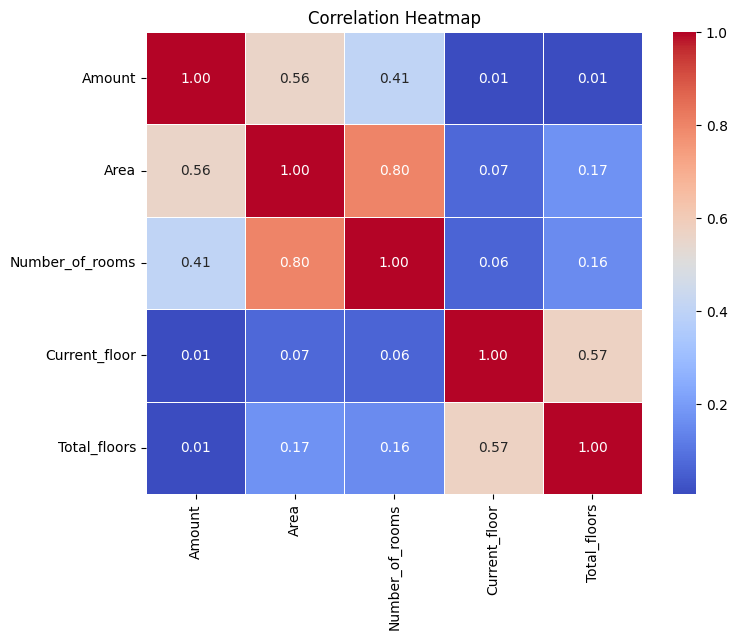

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

to_numeric = ['Amount', 'Area', 'Number_of_rooms','Current_floor', 'Total_floors'] 
numeric_data = data[to_numeric]
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [8]:
data = data[(df['Amount'] > 20_000) & (df['Amount'] < 600_000)]

In [9]:
data['Price_per_sqm'] = data['Amount'] / data['Area']

C:\Users\Nariman\AppData\Local\Temp\ipykernel_10600\3397903115.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Price_per_sqm'] = data['Amount'] / data['Area']


In [10]:
data['Location_length'] = data['Location'].str.len()

C:\Users\Nariman\AppData\Local\Temp\ipykernel_10600\3929028353.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Location_length'] = data['Location'].str.len()


In [11]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

data['Location_str'] = data['Location'].str.join(' ').str.lower()
data

C:\Users\Nariman\AppData\Local\Temp\ipykernel_10600\2259878218.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Location_str'] = data['Location'].str.join(' ').str.lower()


,Amount,Location,Area,Number_of_rooms,Frontage,Mortgage,Condition,Current_floor,Total_floors,Price_per_sqm,Location_length,Location_str
0,159900,"['Əhmədli m.', 'Xətai r.', 'Əhmədli q.']",55.0,2.0,1,0,1,5.0,9.0,2907.272727,40,"[ ' ə h m ə d l i m . ' , ' x ə t a i r ..."
1,127000,['Xətai r.'],60.0,2.0,1,0,1,8.0,9.0,2116.666667,12,[ ' x ə t a i r . ' ]
2,274000,"['Təhsil Nazirliyi', 'Nəriman Nərimanov m.', '...",140.0,5.0,1,1,1,5.0,5.0,1957.142857,60,"[ ' t ə h s i l n a z i r l i y i ' , ' n ..."
3,278000,"['Beşmərtəbə', 'Mərkəzi Univermaq', 'Nizami m....",85.0,3.0,1,0,1,3.0,3.0,3270.588235,92,"[ ' b e ş m ə r t ə b ə ' , ' m ə r k ə z i ..."
4,165000,"['Memar Əcəmi m.', 'Nəsimi r.', '4-cü mikroray...",75.0,3.0,1,0,1,4.0,5.0,2200.000000,53,"[ ' m e m a r ə c ə m i m . ' , ' n ə s ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
957,180000,"['Beşmərtəbə', 'Qış parkı', 'Nizami m.', 'Sahi...",95.0,3.0,1,0,1,2.0,4.0,1894.736842,65,"[ ' b e ş m ə r t ə b ə ' , ' q ı ş p a r ..."
958,116000,"['Xalqlar Dostluğu m.', 'Nizami r.', '8-ci kil...",50.0,3.0,1,0,1,4.0,5.0,2320.000000,56,"[ ' x a l q l a r d o s t l u ğ u m . ' , ..."
959,198000,"['Əhmədli m.', 'Xətai r.', 'Əhmədli q.']",85.0,3.0,1,0,1,6.0,9.0,2329.411765,40,"[ ' ə h m ə d l i m . ' , ' x ə t a i r ..."
960,140000,['Xətai r.'],58.0,2.0,1,0,1,6.0,9.0,2413.793103,12,[ ' x ə t a i r . ' ]


In [12]:
X = data[['Area', 'Number_of_rooms', 'Frontage', 'Mortgage', 'Condition', 'Current_floor', 'Total_floors',"Location_length", 'Location_str']]
y = data['Amount']

In [13]:
preprocessor = ColumnTransformer(
    transformers=[
        ('loc', OneHotEncoder(handle_unknown='ignore'), ['Location_str'])
    ],
    remainder='passthrough'
)

In [14]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=42))
])

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47)

In [16]:
model.fit(X_train, y_train)

c:\Users\Nariman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('loc',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Location_str'])])),
                ('regressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=200, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [17]:
y_pred = model.predict(X_test)

In [18]:
results_df = pd.DataFrame({
    'Actual_Amount': y_test.values,
    'Predicted_Amount': y_pred.round(2)
})

print(results_df.head(10))

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nMean Absolute Error: {mae:,.2f} AZN")
print(f"R² Score: {r2:.4f}")

   Actual_Amount  Predicted_Amount
0         200000     164744.000000
1         110000     133809.640625
2         149000     129953.929688
3         220000     120668.148438
4         129000     135634.312500
5         140000     122558.343750
6         120000     152834.156250
7         163000     174056.062500
8         137000     137514.890625
9         168000     141698.640625

Mean Absolute Error: 22,971.83 AZN
R² Score: 0.7246
